In [69]:
# -*- coding: utf-8 -*-
import sys, os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as scio
import gc

def load_Img(imgDir,imgFoldName,subFold):
    imgs = os.listdir(imgDir+"/"+imgFoldName)
    labels = os.listdir(imgDir+"/"+subFold)
    imgNum = len(imgs)
    labelNum = len(labels)
    #input size is 512 * 512 * 1
    M1 = cv2.getRotationMatrix2D((256,256), 90, 1.0)
    
    M2 = cv2.getRotationMatrix2D((256,256), 180, 1.0)
    
    M3 = cv2.getRotationMatrix2D((256,256), 270, 1.0)
    
    data = np.empty((imgNum * 2,512,512,1))
    label = np.empty((imgNum * 2,512,512,1))
    if labelNum == imgNum:
        print (imgDir + ' imgNum: ',imgNum)
        for i in range (imgNum):
            img = cv2.imread(imgDir+"/"+imgFoldName+"/"+imgs[i])
            img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
            img0 = img / 255            
#             arr_0 = cv2.flip(img0,0)
#             #图像和标注增强
#             ###################################################
            img1 = cv2.warpAffine(img0, M1,(512,512))
            img2 = cv2.warpAffine(img0, M2,(512,512))
            img3 = cv2.warpAffine(img0, M3,(512,512))
            
            arr_0 = cv2.flip(img0,0)
            arr_1 = cv2.flip(img1,0)
            arr_2 = cv2.flip(img2,0)
            arr_3 = cv2.flip(img3,0)
            img_list = [img0,img1,img2,img3,arr_0,arr_1,arr_2,arr_3]
#             ##################################################
                
            
#             data[i,:,:,0] = img0
#             data[i + imgNum,:,:,0] = arr_0         

#             ###################################################
            lab0 = cv2.imread(imgDir+"/"+subFold+"/"+labels[i])
            lab0 = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
            lab1 = cv2.warpAffine(lab0, M1,(512,512))
            lab2 = cv2.warpAffine(lab0, M2,(512,512))
            lab3 = cv2.warpAffine(lab0, M3,(512,512))
            
            larr_0 = cv2.flip(lab0,0)
            larr_1 = cv2.flip(lab1,0)
            larr_2 = cv2.flip(lab2,0)
            larr_3 = cv2.flip(lab3,0)
            
            label_list = [lab0,lab1,lab2,lab3,larr_0,larr_1,larr_2,larr_3]
            
            for j in range (len(img_list)):
                data[i + imgNum * j,:,:,0]= img_list[j]
                label[i + imgNum * j,:,:,0]= label_list[j]
#             #################################################
#             img = cv2.imread(imgDir+"/"+ subFold +"/"+labels[i])
#             img0 = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#             arr_0 = cv2.flip(img0,0)                            
#             label[i,:,:,0] = img0
#             label[i + imgNum,:,:,0] = arr_0
            gc.collect()
            
    return data,label

In [70]:
if __name__ == '__main__':
    liver_data, liver_label =load_Img('liver1','img','cls')
    print (liver_data.shape)
    spleen_data, spleen_label =load_Img('spleen1','img','cls')
    print (spleen_data.shape)

MemoryError: 

(918, 512, 512, 1)
302data_1.jpg


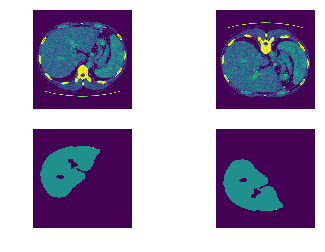

In [64]:
    print (liver_data.shape)
    print(os.listdir('./liver/cls')[0])
    plt.subplot(221)
    plt.imshow(liver_data[0,:,:,0])
    plt.axis('off')
    plt.subplot(222)
    plt.imshow(liver_data[459 ,:,:,0])
    plt.axis('off')
    plt.subplot(223)
    plt.imshow(liver_label[0,:,:,0])
    plt.axis('off')
    plt.subplot(224)
    plt.imshow(liver_label[459,:,:,0])
    plt.axis('off')
    plt.show()  